# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [5]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [6]:
#your code 
spaceship.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [9]:
#your code here

spaceship = spaceship.dropna()

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

AttributeError: 'PairGrid' object has no attribute 'corr'

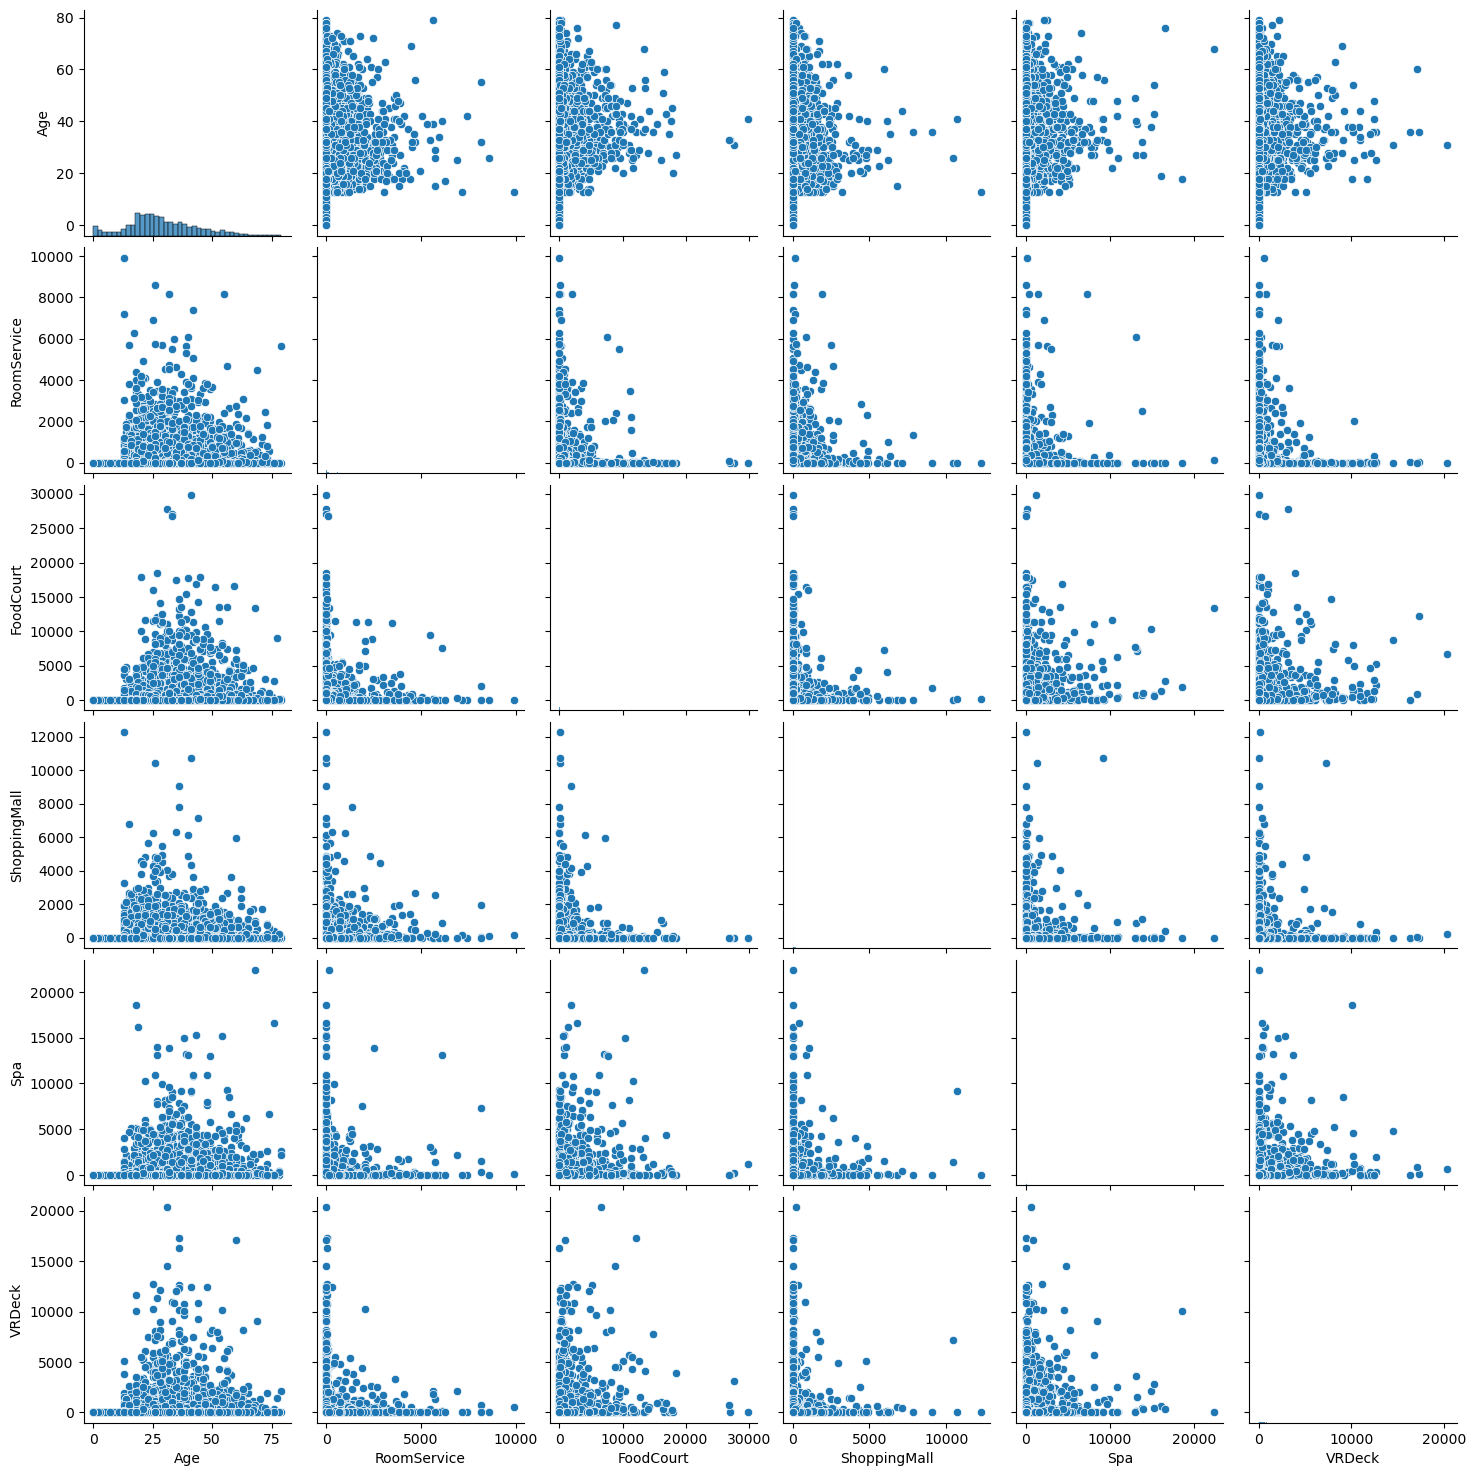

In [42]:
#your code here
import seaborn as sns
import matplotlib.pyplot as plt
#feature  = spaceship[['Age','RoomSevice']]
features = spaceship.select_dtypes(include=[np.number])


#  make a pairplot 
sns.pairplot(features).corr()



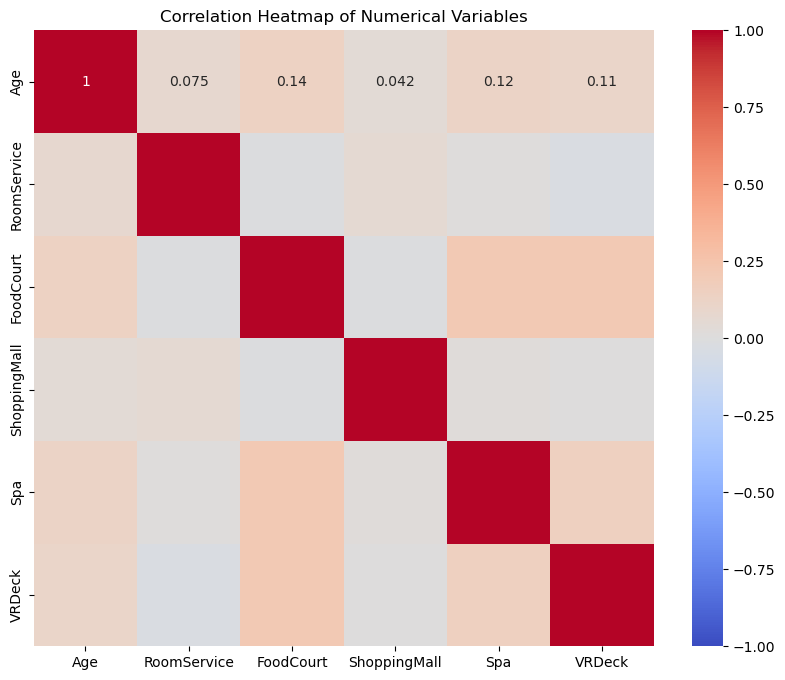

In [43]:
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [47]:
import plotly.express as px
# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

In [13]:
#your code here
target = spaceship['Transported']
target

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [18]:
#your code here
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [28]:
# Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [30]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

Fit the model to your data.

In [34]:
#your code here
knn.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.score(X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.5264750378214826

Evaluate your model.

In [32]:
#your code here
knn.score(X_test, y_test)

0.7337367624810892

In [23]:
pred = knn.predict(X_test)
pred

array([ True,  True,  True, ...,  True,  True, False])

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precisión
precision = precision_score(y_test, pred, average='macro')
print(f'Precisión: {precision}')

Precisión: 0.7337902710721325


In [25]:
recall = recall_score(y_test, pred, average='macro')
print(f'Recall: {recall}')

Recall: 0.7337367624810893


In [26]:
f1 = f1_score(y_test, pred, average='macro')
print(f'F1-score: {f1}')

F1-score: 0.7337215264044532


**Congratulations, you have just developed your first Machine Learning model!**